In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

In [2]:
df1 = pd.read_csv('xxx.csv',sep=";")
df2 = pd.read_csv('xxx.csv',sep=";")
df3 = pd.read_csv('xxx.csv',sep=";")




In [3]:
df = pd.concat([df1, df2,df3], ignore_index=True)
len(df)

1958

# Preprocessing

In [5]:
jakarta = pytz.timezone('Asia/Jakarta')
df['datetime_created'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ')
                                               .replace(tzinfo=pytz.UTC)
                                               .astimezone(jakarta))
df['date_created'] = df['datetime_created'].apply(lambda x: x.date())
df['time_created'] = df['datetime_created'].apply(lambda x: x.time())
df = df.drop(['datetime_created'],axis=1)
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18
...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55


In [6]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18
...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55


In [7]:
from preprocessor.api import clean, tokenize, parse
import re


In [8]:
cleaned_texts = []

# Loop through each element in the 'Text' column
for text in df['Text']:
    cleaned_text = clean(text)  # Replace 'clean' with your cleaning function
    cleaned_texts.append(cleaned_text)

# Create a new column with the cleaned texts
df['Cleaned_Text'] = cleaned_texts
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger..."
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...
...,...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus..."
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha..."


In [9]:
def clean_tweets(tweet):
    #use slang words and stopwords to clean the data
    # the stop words and slang words that is used, comes from https://github.com/louisowen6/NLP_bahasa_resources
    # after some modification
    # Happy Emoticons
    emoticons_happy = set([
        ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
        ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
        '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
        'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
        '<3'
        ])

    # Sad Emoticons
    emoticons_sad = set([
        ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
        ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
        ':c', ':{', '>:\\', ';('
        ])

    #Emoji patterns
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)

    #combine sad and happy emoticons
    emoticons = emoticons_happy.union(emoticons_sad)
    my_file = open("Indonesia_Sentiment_Analysis/cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("Indonesia_Sentiment_Analysis/cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)

    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    #modify the slang words into a more proper one
    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)

In [10]:
filtered_tweet=clean_tweets(cleaned_text)
filtered_tweet

'indonesia elon muskstarlink service'

In [11]:
def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

In [12]:
filtered_texts = []

# Loop through each element in the 'Text' column
for text in df['Cleaned_Text']:
    filtered_text = clean_tweets(text)  # Replace 'clean' with your cleaning function
    # keyword = ['tsel','indihome','telkomsel',]
    # keyword = ['indosat','im3','tri',]
    # keyword = ['xl','myxl','axis','axisgsm']
    keyword = ['biznet','firstmedia','first media','indihome','myrepublic','my republic','iconnet','starlink']
    #Filter word need to be deleted


    clean_text_extra = del_word(filtered_text,keyword)
    filtered_texts.append(clean_text_extra)

# Create a new column with the cleaned texts
df['Filtered_Text'] = filtered_texts
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text,Filtered_Text
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger...",tenang tenang tenang gerakan separatis teroris...
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...,berbahaya indonesia benar
...,...,...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus...",pedalaman susah connect internet indonesia sat...
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...,congratulation elon i am very bahagia that fin...
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...


In [13]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text,Filtered_Text
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger...",tenang tenang tenang gerakan separatis teroris...
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...,berbahaya indonesia benar
...,...,...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus...",pedalaman susah connect internet indonesia sat...
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...,congratulation elon i am very bahagia that fin...
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...


In [14]:
len(df[df['Filtered_Text'].isnull()==True])

0

In [15]:
def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

In [16]:
df['word_length'] = df['Filtered_Text'].apply(lambda x:count_words(x))
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text,Filtered_Text,word_length
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger...",tenang tenang tenang gerakan separatis teroris...,17
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...,14
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...,16
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...,14
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...,berbahaya indonesia benar,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...,32
641,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus...",pedalaman susah connect internet indonesia sat...,17
642,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...,congratulation elon i am very bahagia that fin...,11
643,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...,6


In [17]:
df['word_length'].value_counts().sort_index()

word_length
0      7
1      6
2      6
3     10
4     14
5     22
6     20
7     31
8     32
9     35
10    30
11    19
12    33
13    33
14    49
15    22
16    30
17    14
18    12
19    13
20    22
21    15
22    30
23    17
24    12
25     9
26     9
27    11
28     7
29     8
30     6
31     6
32    10
33     4
34     9
35     4
36     6
37     3
38     3
39     3
40     2
41     2
42     4
43     2
45     1
46     1
49     1
Name: count, dtype: int64

In [18]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text,Filtered_Text,word_length
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger...",tenang tenang tenang gerakan separatis teroris...,17
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...,14
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...,16
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...,14
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...,berbahaya indonesia benar,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...,32
634,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus...",pedalaman susah connect internet indonesia sat...,17
635,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...,congratulation elon i am very bahagia that fin...,11
636,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...,6


In [19]:
df.to_csv('Preprocessed_xxx.csv', sep=';', index=False)


In [54]:
df = pd.read_csv('Preprocessed_MyRep_complete.csv',sep=";")


In [20]:
word_dict = {}
for i in range(0,len(df['Filtered_Text'])):
    sentence = df['Filtered_Text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [21]:
lexicon = pd.read_csv('Indonesia_Sentiment_Analysis/lexicon/full_lexicon_afa.csv',sep=";")
lexicon

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
...,...,...,...
11187,menutup,-5,1
11188,kesedot,-5,1
11189,anying,-5,1
11190,muak,-5,1


In [22]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [23]:
lexicon['number_of_words'].value_counts()

number_of_words
1    10435
2      698
3       29
4       25
5        5
Name: count, dtype: int64

In [24]:
negasi = ['bukan','tidak','ga','gk','kgk','gak','tdk','bkn']

sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Filtered_Text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        # else:
        # # # if not, then check the root word
        #     kata_dasar = stemmer.stem(word)
        #     if kata_dasar in lexicon_word:
        #         sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # # if still negative, try to match the combination of words with the adjacent words
        #     elif(n_words>1):
        #         if ind-1>-1:
        #             back_1    = words[ind-1]+' '+word
        #             if (back_1 in lexicon_word):
        #                 sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
        #             elif(ind-2>-1):
        #                 back_2    = words[ind-2]+' '+back_1
        #                 if back_2 in lexicon_word:
        #                     sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [25]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)


In [26]:
df['sentiment'] = df_sen['sentiment'].copy()
df

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,date_created,time_created,Cleaned_Text,Filtered_Text,word_length,sentiment
0,Syahiduz Zaman,@syahiduzzaman,2024-05-21T02:50:30.000Z,"Tenang, tenang, tenang ...\nDengan Starlink, g...",🤣 🤣 🤣,NaN,NaN,NaN,2024-05-21,09:50:30,"Tenang, tenang, tenang ...Dengan Starlink, ger...",tenang tenang tenang gerakan separatis teroris...,17,20
1,Norberto Branda,@NorbertoBranda,2024-05-21T02:49:23.000Z,Exciting times ahead for Indonesia! Congrats o...,NaN,NaN,NaN,1,2024-05-21,09:49:23,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...,14,3
2,mbahGandalf,@mbahGandalf,2024-05-21T02:48:18.000Z,Dgn masuknya/beroperasinya STARLINK ke Indones...,💪,NaN,NaN,NaN,2024-05-21,09:48:18,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...,16,0
3,Atr/Bpn Kudus,@KANTAHKABKUDUS,2024-05-21T02:46:24.000Z,Dalam rangkaian kegiatan World Water Forum (WW...,NaN,NaN,NaN,1,2024-05-21,09:46:24,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...,14,8
4,Andrean Pratama,@Andrean21062023,2024-05-21T02:46:18.000Z,Kata \n@henrysubiakto\n starlink itu berbahaya...,NaN,NaN,NaN,NaN,2024-05-21,09:46:18,Kata starlink itu berbahaya untuk Indonesia ap...,berbahaya indonesia benar,3,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Eva McMillan,@EvasTeslaSPlaid,2024-05-20T00:59:31.000Z,Elon Musk is in Indonesia for the launch of St...,♥,22,71,406,2024-05-20,07:59:31,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...,32,0
634,𝑨𝒏𝒕𝒐 𝑴𝒌𝒎.,@248Mkm,2024-05-20T00:55:45.000Z,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",😄 🤭,3,1,6,2024-05-20,07:55:45,"Yg jadi pertanyaan,Selama ini di pedalaman sus...",pedalaman susah connect internet indonesia sat...,17,-12
635,к๏и¢๏ †µяµмµ,@pakbudbugs,2024-05-20T00:55:24.000Z,Congratulation Elon..\nI am very happy that St...,NaN,NaN,NaN,NaN,2024-05-20,07:55:24,Congratulation Elon..I am very happy that Star...,congratulation elon i am very bahagia that fin...,11,4
636,rakyatpembaruan.com,@rakyatpembaruan,2024-05-20T00:54:55.000Z,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",NaN,NaN,NaN,NaN,2024-05-20,07:54:55,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...,6,6


In [27]:
cek_df = pd.DataFrame([])
cek_df['Real Text'] = df['Text'].copy()
cek_df['Clean Text'] = df['Filtered_Text'].copy()
cek_df['num_word'] = df['word_length'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()
cek_df

,Real Text,Clean Text,num_word,sentiment
0,"Tenang, tenang, tenang ...\nDengan Starlink, g...",tenang tenang tenang gerakan separatis teroris...,17,20
1,Exciting times ahead for Indonesia! Congrats o...,exciting times ahead for indonesia congrats on...,14,3
2,Dgn masuknya/beroperasinya STARLINK ke Indones...,masuknya beroperasinya indonesia indonesia ngr...,16,0
3,Dalam rangkaian kegiatan World Water Forum (WW...,dalam rangkaian world water forum wwf ceo spac...,14,8
4,Kata \n@henrysubiakto\n starlink itu berbahaya...,berbahaya indonesia benar,3,-2
...,...,...,...,...
633,Elon Musk is in Indonesia for the launch of St...,elon musk is in indonesia for launch of wearin...,32,0
634,"Yg jadi pertanyaan,\nSelama ini di pedalaman s...",pedalaman susah connect internet indonesia sat...,17,-12
635,Congratulation Elon..\nI am very happy that St...,congratulation elon i am very bahagia that fin...,11,4
636,"Starlink Resmi Beroperasi di Indonesia, Ini Ha...",resmi beroperasi indonesia harga berlangganan ...,6,6


In [28]:
df.to_csv('output_starlink.csv', sep=';', index=False)


In [30]:
# Count values less than 0

# hdf = pd.read_csv('output_xl.csv',sep=";")
# df = hdf.sample(n=550, random_state=14)  # Set random_state for reproducibility

negative_count = (df['sentiment'] < 0).sum()

# Count values greater than or equal to 0
non_negative_count = (df['sentiment'] >= 0).sum()

print(f"Number of values less than 0: {negative_count}")
print(f"Number of values greater than or equal to 0: {non_negative_count}")

Number of values less than 0: 118
Number of values greater than or equal to 0: 520
18.294573643410853
80.62015503875969


In [31]:
df.to_csv('output_Starlink_complete.csv', sep=';', index=False)


In [32]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

1828

In [33]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

344

In [34]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [35]:
ns_words_list

{'indonesia': 637,
 'exciting': 41,
 'times': 38,
 'ahead': 26,
 'for': 112,
 'on': 92,
 'bringing': 45,
 'high': 34,
 'speed': 35,
 'internet': 301,
 'to': 239,
 'region': 10,
 'with': 64,
 'base': 6,
 'transceiver': 6,
 'station': 6,
 'kominfo': 5,
 'world': 55,
 'water': 29,
 'wwf': 18,
 'ceo': 34,
 'spacex': 62,
 'tesla': 36,
 'elon': 278,
 'musk': 275,
 'bali': 82,
 'peluncuran': 24,
 'puskesmas': 35,
 'sumerta': 16,
 'kelod': 16,
 'denpasar': 28,
 'provinsi': 15,
 'luncurkan': 6,
 'i': 22,
 'will': 23,
 'and': 109,
 'remote': 41,
 'that': 26,
 'access': 39,
 'especially': 5,
 'health': 32,
 'education': 13,
 'in': 306,
 'congratulations': 11,
 'power': 7,
 'of': 119,
 'country': 36,
 't': 13,
 'wait': 5,
 'see': 11,
 'impact': 8,
 'it': 18,
 'have': 14,
 'community': 4,
 'burning': 4,
 'iran': 8,
 'you': 43,
 'just': 9,
 'launched': 29,
 'a': 90,
 'new': 5,
 'satellite': 77,
 'your': 7,
 'all': 8,
 'use': 4,
 'there': 9,
 'an': 15,
 'listrik': 5,
 'archipelago': 36,
 'sih': 6,
 '

In [36]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

indonesia 637
in 306
internet 301
elon 278
musk 275
to 239
of 119
for 112
and 109
service 108
on 92
a 90
s 87
bali 82
satellite 77
is 72
with 64
spacex 62
world 55
launches 55


In [37]:
word_to_plot = df['Filtered_Text'].copy()

In [38]:
negasi = ['bukan','tidak','ga','gk','kgk']

In [39]:
def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

In [40]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

In [41]:
word_to_plot_1

0      tenang tenang tenang gerakan separatis teroris...
1      exciting times ahead for indonesia congrats on...
2      masuknya beroperasinya indonesia indonesia ngr...
3      dalam rangkaian world water forum wwf ceo spac...
4                             berbahaya indonesia benar 
                             ...                        
633    elon musk is in indonesia for launch of wearin...
634    pedalaman susah connect internet indonesia sat...
635    congratulation elon i am very bahagia that fin...
636    resmi beroperasi indonesia harga berlangganan ...
637                 indonesia elon muskstarlink service 
Name: Filtered_Text, Length: 638, dtype: object

In [42]:
word_dict = {}
for i in range(0,len(word_to_plot_1)):
    sentence = word_to_plot_1[i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
word_dict["im3"] = word_dict["im"]
del word_dict["im"]


In [ ]:
# del word_dict["gb"]
# del word_dict["nya"]
# del word_dict["sih"]
# del word_dict["to"]
del word_dict["deh"]


In [43]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:50]
for i in sort_orders:
    print(i[0], i[1])

indonesia 637
in 306
internet 301
elon 278
musk 275
to 239
of 119
for 112
and 109
service 108
on 92
a 90
s 87
bali 82
satellite 77
is 72
with 64
spacex 62
world 55
launches 55
launch 55
bringing 45
you 43
layanan 42
exciting 41
remote 41
access 39
satelit 39
times 38
tesla 36
country 36
archipelago 36
speed 35
puskesmas 35
high 34
ceo 34
services 34
health 32
congrats 31
dalam 29
water 29
launched 29
this 29
more 29
largest 29
areas 29
denpasar 28
connectivity 28
forum 27
ahead 26


In [ ]:
sort_orders

In [ ]:
df

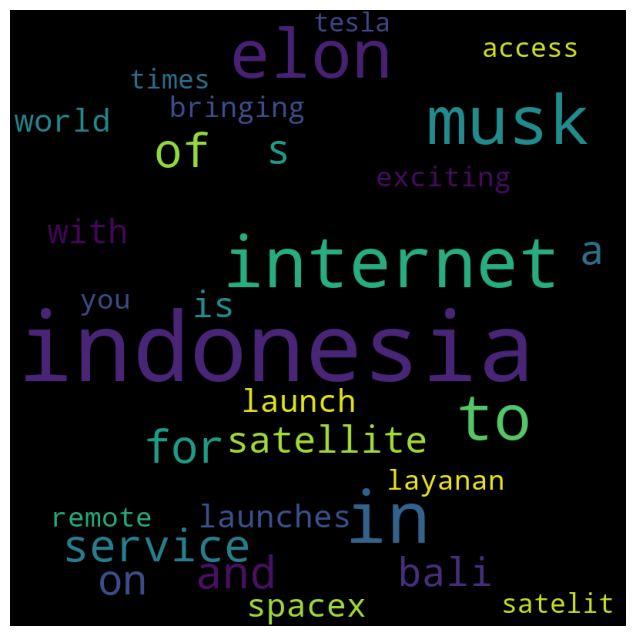

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with a 'Words' column
# data = {'Words': ['banget', 'lambat', 'admin', 'wifi', 'pakai', 'direct', 'message', 'internet', 'nya', 'gangguan', 'jaringan', 'sih', 'bayar', 'si', 'deh', 'cek', 'mati', 'putus', 'jelek', 'tv', 'melulu', 'anak', 'anjing', 'benar', 'jam', 'halo', 'kasih', 'bermasalah', 'gabisa', 'rumah', 'error', 'pagi', 'mohon', 'respon', 'paket', 'malam', 'doang', 'terima', 'kak', 'eror', 'merah', 'tagihan', 'tai', 'gini', 'koneksi', 'dr', 'wa', 'saudara', 'laki-laki', 'lapor']}

# df = pd.DataFrame(data)

# Count the frequency of each word
# word_counts = df['Words'].value_counts()

# Sort the words by frequency in descending order
# sorted_word_counts = word_counts.sort_values(ascending=False)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=30, min_font_size=20).generate_from_frequencies(word_dict)

# Plot the word cloud
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sort_orders

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with a 'Words' column
data = {'Words': ['banget', 'lambat', 'admin', 'wifi', 'pakai', 'direct', 'message', 'internet', 'nya', 'gangguan', 'jaringan', 'sih', 'bayar', 'si', 'deh', 'cek', 'mati', 'putus', 'jelek', 'tv', 'melulu', 'anak', 'anjing', 'benar', 'jam', 'halo', 'kasih', 'bermasalah', 'gabisa', 'rumah', 'error', 'pagi', 'mohon', 'respon', 'paket', 'malam', 'doang', 'terima', 'kak', 'eror', 'merah', 'tagihan', 'tai', 'gini', 'koneksi', 'dr', 'wa', 'saudara', 'laki-laki', 'lapor']}

df = pd.DataFrame(data)

# Count the frequency of each word
text = ' '.join(df['Words'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=35, min_font_size=20).generate(text)


# Generate the word cloud
# wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=5100, min_font_size=20).generate_from_frequencies(sorted_word_counts)

# Plot the word cloud
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Analisis
Indihome
Number of values less than 0: 406
Number of values greater than or equal to 0: 144
total 550
73%

Sentiment analysis is crawled using python automation, because using twitter API now cannot integrated with python code.
Each of day at 9 o'clock crawled the twitter with search box using Indihome, with filter in account name, username, ads, and must contain indihome or telkomsel in the tweet content from that I used lexicon method to calculate sentiment. Lexicon calculate by scoring phrase using several each of word scores
negatif ada sekian persen dari total
Masih ada lebih banyak nilai sentimen negatif yang seharusnya masuk kalau melihat dari bentuk kalimat karena banyak yang menggunakan kalimat satire yang dibaca sebagai kata-kata positif, contoh: Pengguna Indihome adalah calon pengghuni surga, belajar bersabar dengan menggunakan Indihome
Kalimat positif hampir 80% adalah kalimat pertanyaan kepada admin Indihomecare terkait pemasangan, instalasi, dan paket.
Kalimat positif yang sebenernya mungkin hanya 20% yang mayoritas memuji paket OTT yang diberikan oleh Indihome dan Indihome TV

Telkomsel
negative 298
possitive 202
Total 500
60%

Negative tweets are complains abouat bad signal and performance, Quota and Pulsa that not received after buy it, Why he dont receive a cheap quota package, and how expensive the package, cant redeemo free quota from telkomsel poin, cs not helping
Possitive tweets are about showing off Telkomsel signal, A good OTT package (Disney +)

/var/folders/t2/lw7m_8k914jgqsvv48dm5gsm0000gn/T/ipykernel_15177/2493222209.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sentiment'],color='m',shade=True)


Text(0.5, 0, 'sentiment')

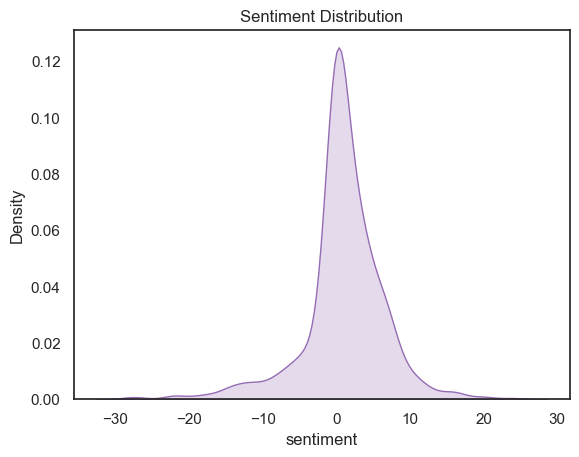

In [45]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<Axes: xlabel='sentiment'>

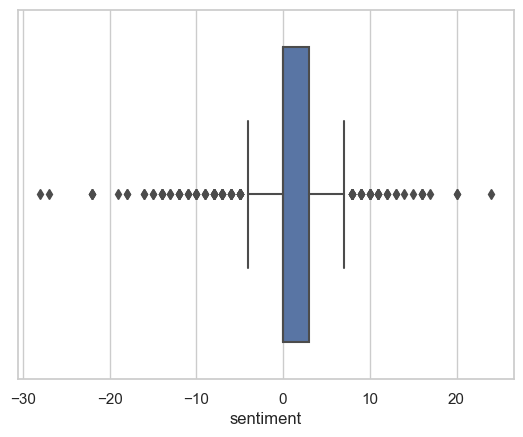

In [46]:
sns.set(style="whitegrid") 
sns.boxplot(x=df['sentiment'])

In [47]:
df['sentiment'] = df['sentiment'].apply(pd.to_numeric, errors='coerce')

# Sum the numeric columns and sort in descending order
top15_word = df['sentiment'].sum().sort_values(ascending=False).head(15)

# Now top15_word contains the top 15 words based on their summed values
print(top15_word)
top15_word = df.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

AttributeError: 'numpy.int64' object has no attribute 'sort_values'

In [48]:
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

NameError: name 'top15_word' is not defined

In [49]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

In [50]:
print('Perfect Correlation')
au

Perfect Correlation


tenang      gerakan      1.000000
            hilang       1.000000
            melek        1.000000
            puas         1.000000
            teroris      1.000000
                           ...   
berkunjung  sentiment    0.000577
lengkap     sentiment    0.000577
obrolan     sentiment    0.000577
perbedaan   sentiment    0.000577
lugas       sentiment    0.000577
Length: 139656, dtype: float64

In [51]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    
    df_corr = au_corr.reset_index(name='Correlation')
    
    return df_corr


print("Top Absolute Correlations")
print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

Top Absolute Correlations
           level_0    level_1  Correlation
0           tenang    gerakan     1.000000
1           tenang     hilang     1.000000
2           tenang      melek     1.000000
3           tenang       puas     1.000000
4           tenang    teroris     1.000000
...            ...        ...          ...
139651  berkunjung  sentiment     0.000577
139652     lengkap  sentiment     0.000577
139653     obrolan  sentiment     0.000577
139654   perbedaan  sentiment     0.000577
139655       lugas  sentiment     0.000577

[139656 rows x 3 columns]


In [52]:
au.to_csv('cek_starlink_complete.csv', sep=';', index=False)